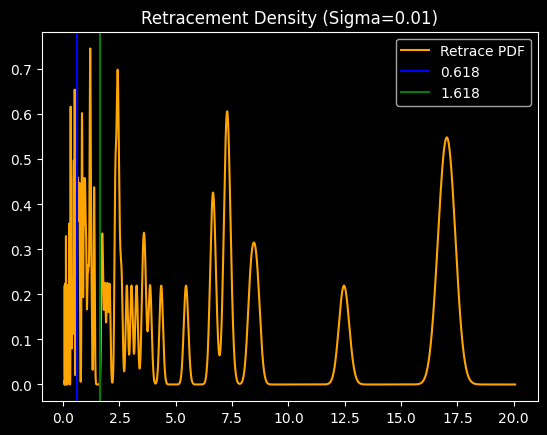

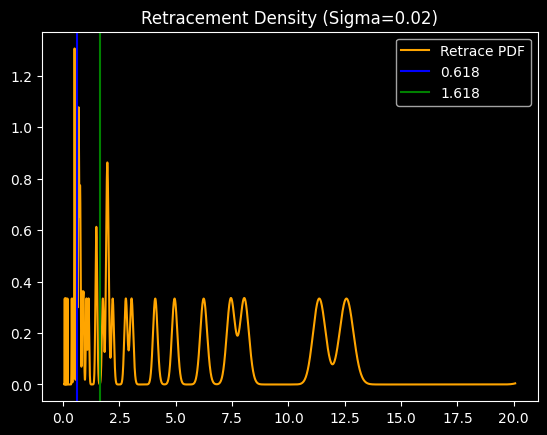

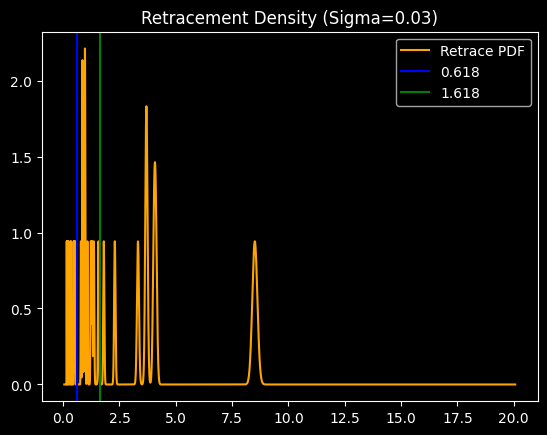

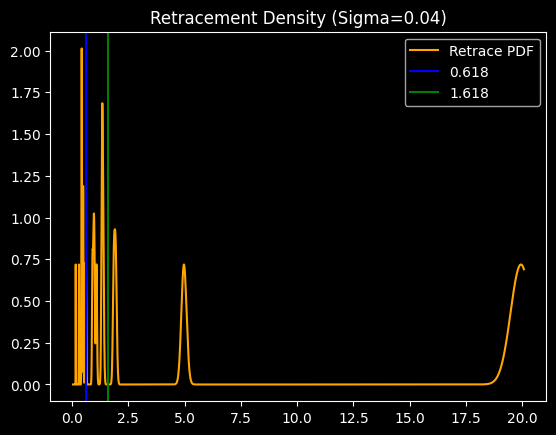

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Dummy get_extremes function for demonstration.
# Replace this with the actual implementation or import if available.
def get_extremes(data, sigma):
    # This is a placeholder. Replace with your actual logic.
    # For demonstration, let's create a DataFrame with the required columns.
    n = len(data)
    extremes = pd.DataFrame({
        'ext_p': data['close'].iloc[::max(1, int(n * sigma))].reset_index(drop=True)
    })
    return extremes

data = pd.read_csv('BTCUSDT3600.csv')
data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')
plt.style.use('dark_background')

for sigma in [0.01, 0.02, 0.03, 0.04]:
    extremes = get_extremes(data, sigma)

    # Find segment heights, retracement ratios
    extremes['seg_height'] = (extremes['ext_p'] - extremes['ext_p'].shift(1)).abs()
    extremes['retrace_ratio'] = extremes['seg_height'] / extremes['seg_height'].shift(1)
    extremes['log_retrace_ratio'] = np.log(extremes['retrace_ratio'])

    # Find kernel of log retrace ratios
    kernal = scipy.stats.gaussian_kde(extremes['log_retrace_ratio'].dropna(), bw_method=0.01)
    retrace_range = np.arange(-3, 3, 0.001)
    retrace_pdf = kernal(retrace_range)
    retrace_pdf = pd.Series(retrace_pdf, index=np.exp(retrace_range))
    retrace_pdf.plot(color='orange', label='Retrace PDF')
    plt.axvline(0.618, label='0.618', color='blue')
    plt.axvline(1.618, label='1.618', color='green')
    plt.title("Retracement Density (Sigma=" + str(sigma) + ")")
    plt.legend()
    plt.show()